In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [29]:
df= pd.read_csv(r'C:\Users\DELL\Downloads\diabetes.csv')

In [31]:
#get a preview of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explatory Data Analysis

In [34]:
#check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
#number of columns and rows in the dataset
df.shape

(768, 9)

In [38]:
#get a statistical summary of the varaibles
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
#check for nulls
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
#group the data by target variable
df.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [45]:
#check the balance
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

# DAta Visualization

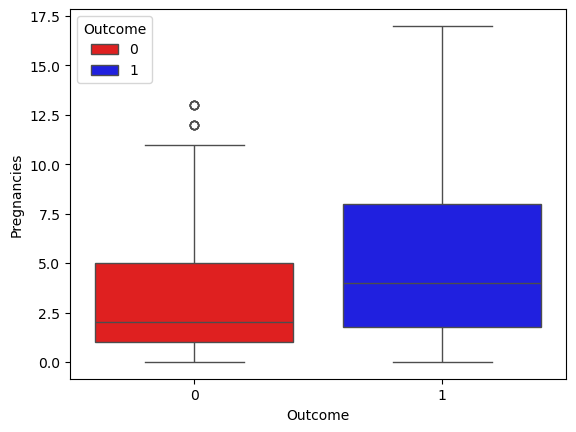

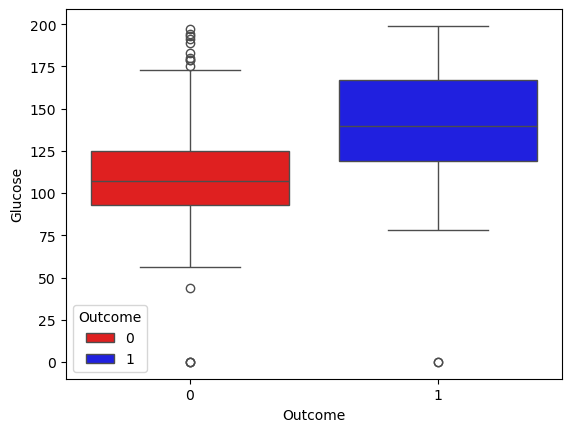

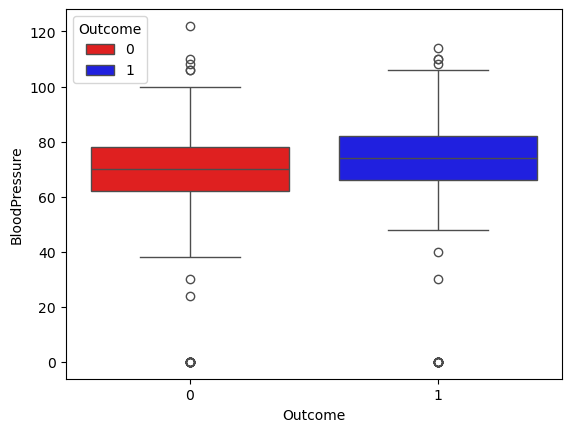

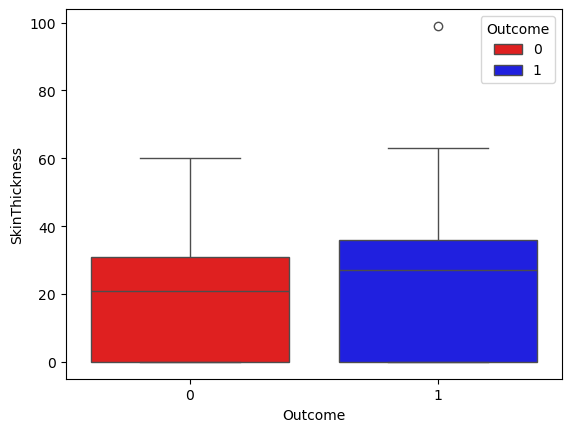

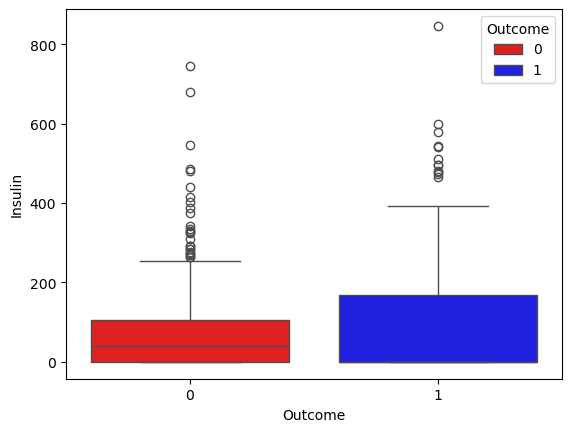

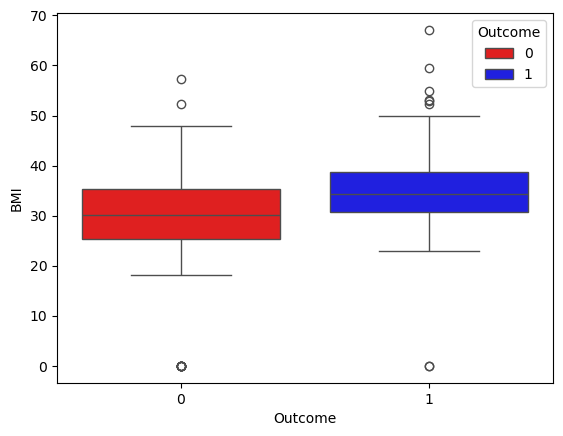

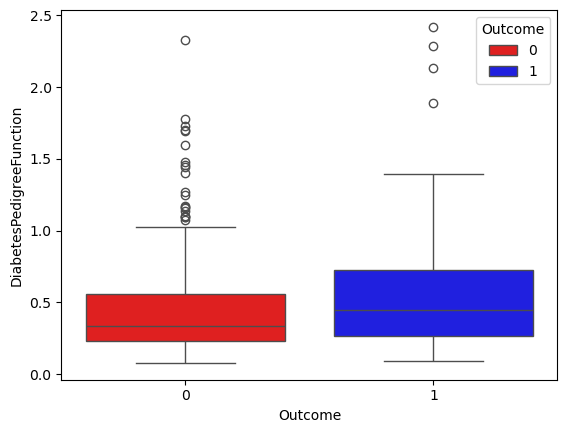

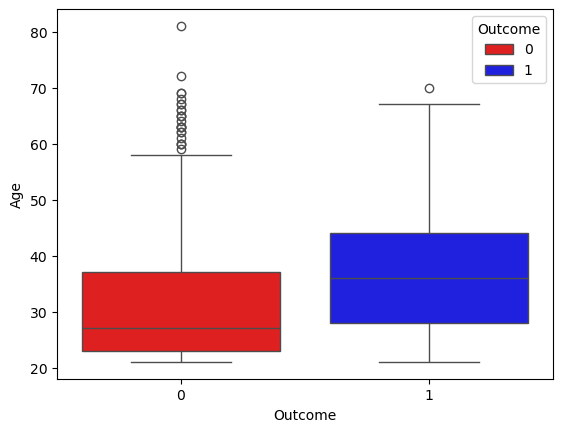

In [48]:
# general insights about the target variable and independent feature
columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x=df['Outcome'], y=df[i], hue='Outcome', palette=['red', 'blue'])

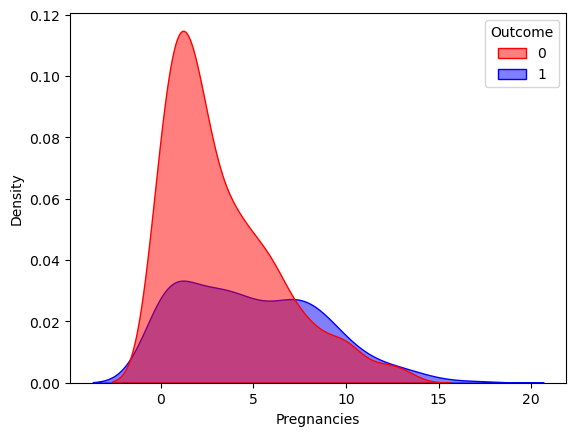

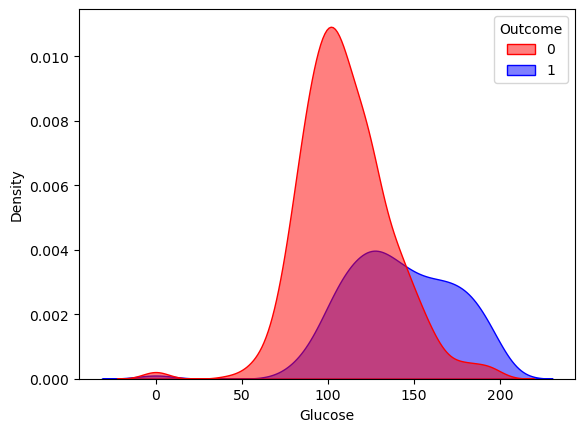

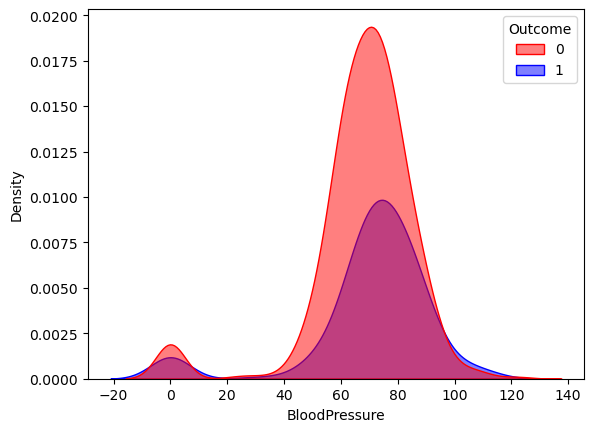

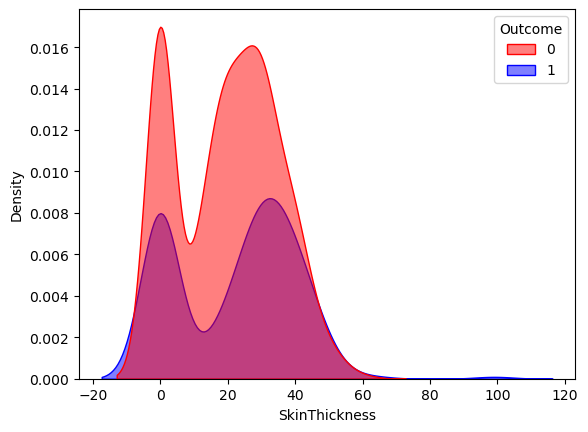

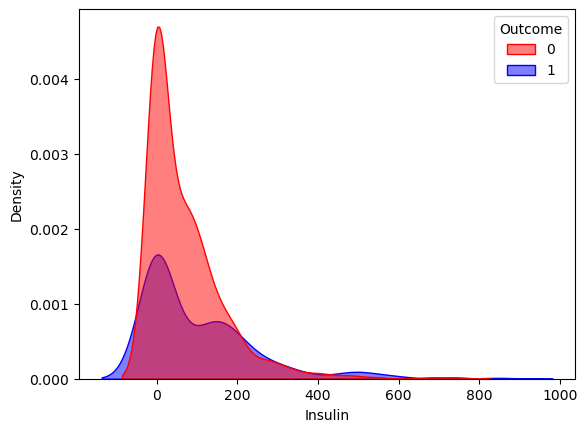

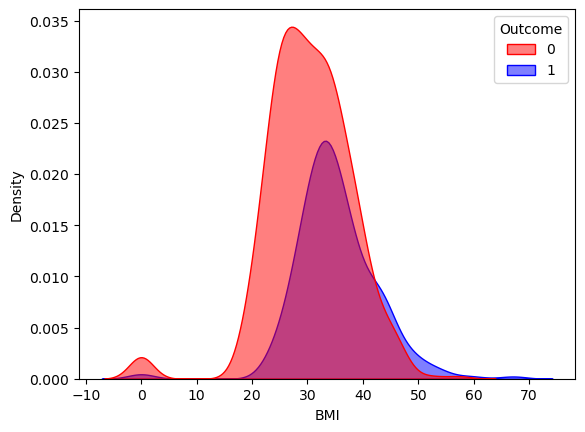

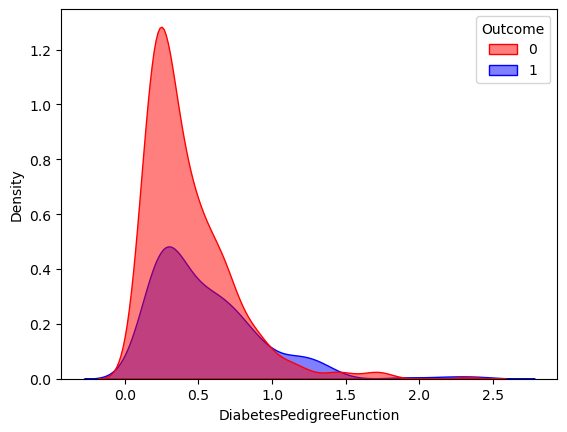

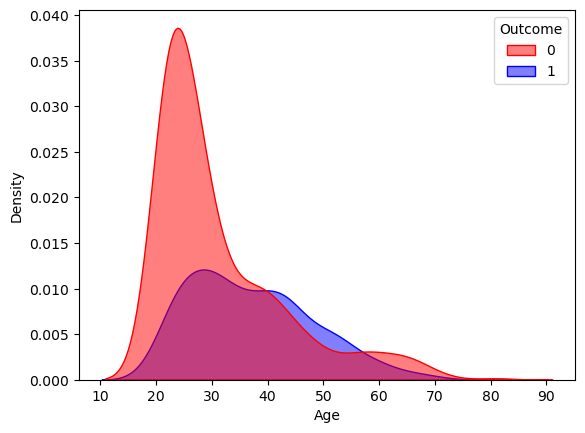

In [50]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i, hue='Outcome', palette=['red', 'blue'], fill=True, alpha=0.5)

**These figures shows that as Insulin , Glucose, BMI, BloodPressure increase , people likelihood to have diabetes increase**

<Axes: >

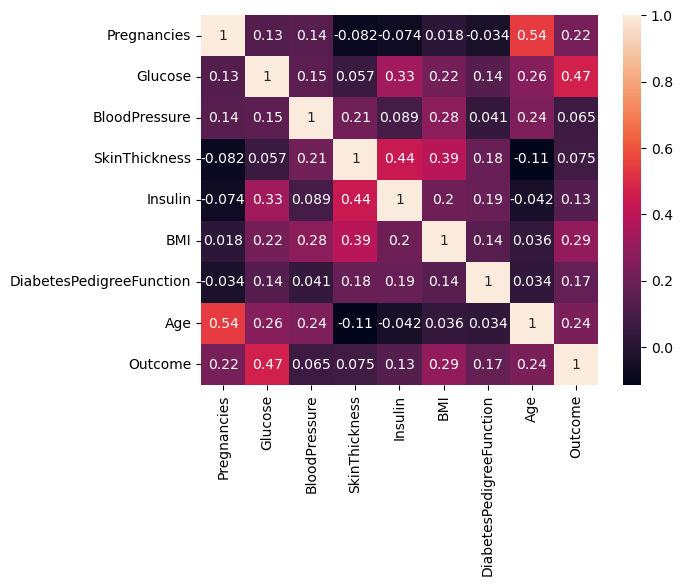

In [52]:

#correlation between the variables
sns.heatmap(df.corr(),annot=True)

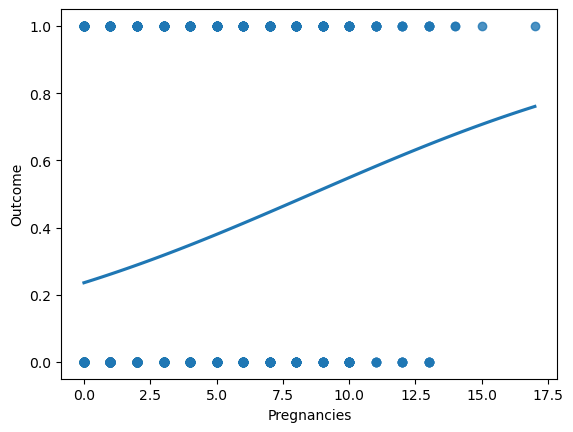

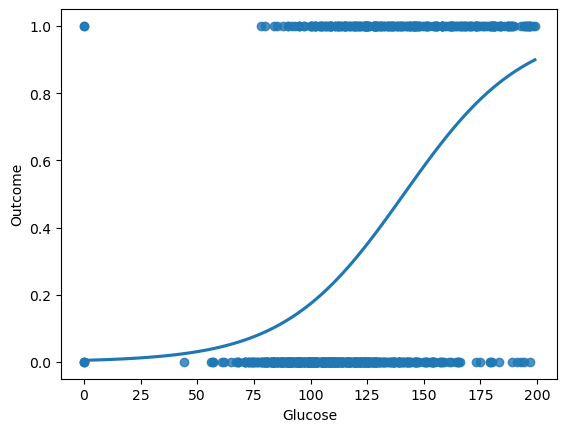

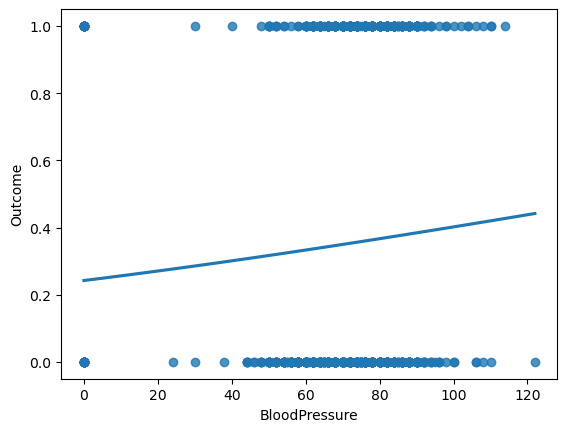

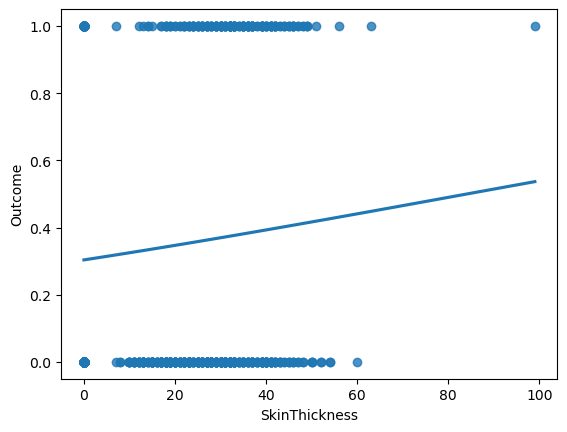

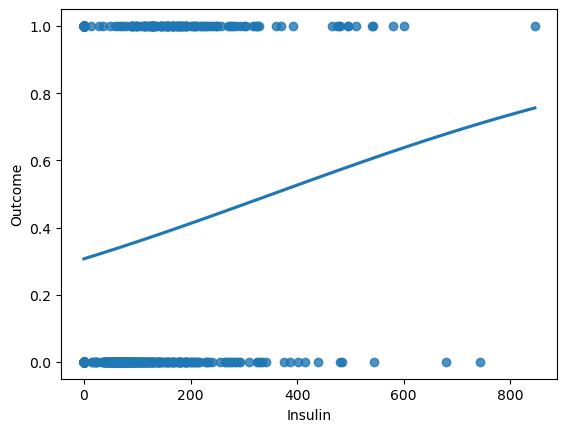

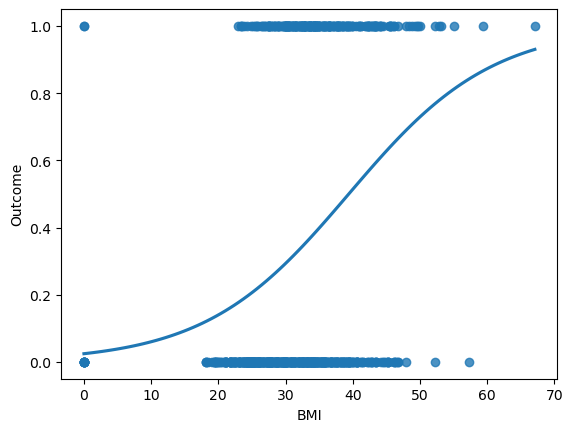

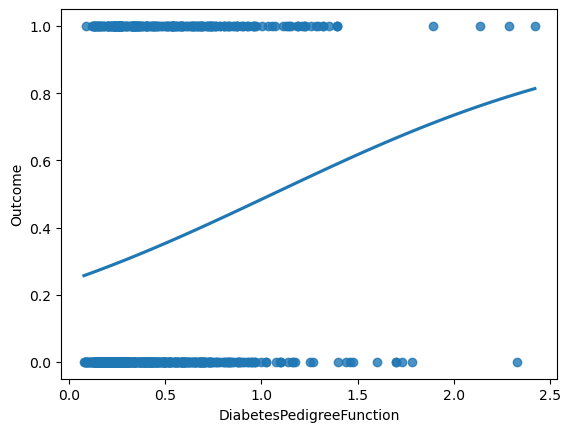

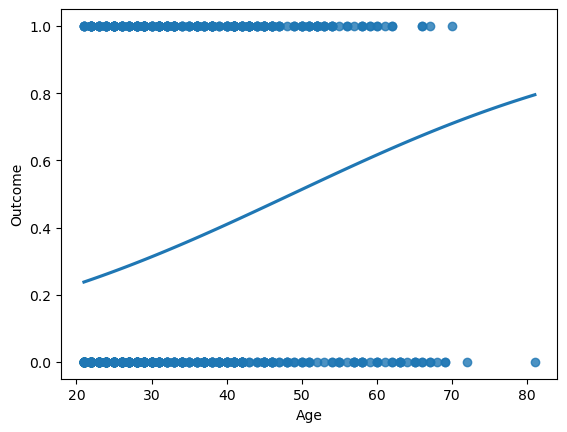

In [54]:
for i in columns:
    plt.figure()
    sns.regplot(x=df[i], y="Outcome", data=df, logistic=True, ci=None)

In [17]:
#build the ML Model
X= df.drop('Outcome', axis=1)
y= df[['Outcome']]

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

In [19]:
model= RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
#predicting on the test set
y_pred= model.predict(X_test)

In [56]:
#calculating the accuracy , recall, precision , and f1 scores
print("Accuracy:", "%.3f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.3f" % precision_score(y_test, y_pred))
print("Recall:", "%.3f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, y_pred))

Accuracy: 0.760
Precision: 0.681
Recall: 0.593
F1 Score: 0.634


### 🔹 **Key Observations**
- **Accuracy**: Measures overall correctness of the model.
- **Precision**: Out of all the patients predicted as diabetic, how many actually have diabetes.
- **Recall**: Out of all actual diabetic patients, how many were correctly identified.
- **F1_Score**: balances Precision and Recall using their harmonic mean. It is especially useful when dealing with imbalanced datasets.

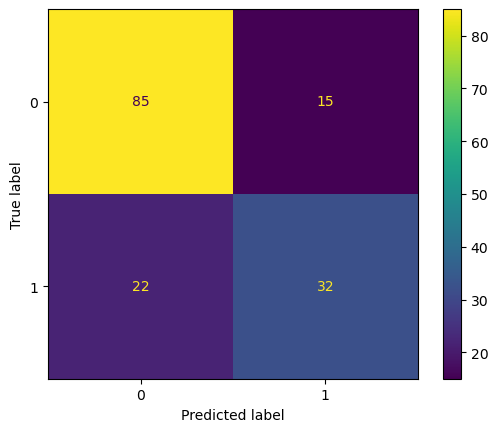

In [58]:
### Build confusion Matrix ###

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

- **True Positives (TP)**: The model correctly predicted **diabetes** (1) for **32** people.
- **True Negatives (TN)**: The model correctly predicted **no diabetes** (0) for **85** people.
- **False Positives (FP)**: The model incorrectly predicted **diabetes** (1) for **15** people who actually don’t have it. This is also known as a **Type I error**.
- **False Negatives (FN)**: The model incorrectly predicted **no diabetes** (0) for **22** people who actually have it. This is a **Type II error**.

This confusion matrix helps in understanding the model's strengths and weaknesses, guiding improvements such as adjusting the decision threshold or using different evaluation metrics.

In [64]:

#Extracting Feature Importance

feature_importance= model.feature_importances_
features=X.columns

In [66]:
#creating dataframe for visualization
importance_df= pd.DataFrame({
        "Feature": features,
    "Importance": feature_importance}).sort_values(by="Importance", ascending=False)


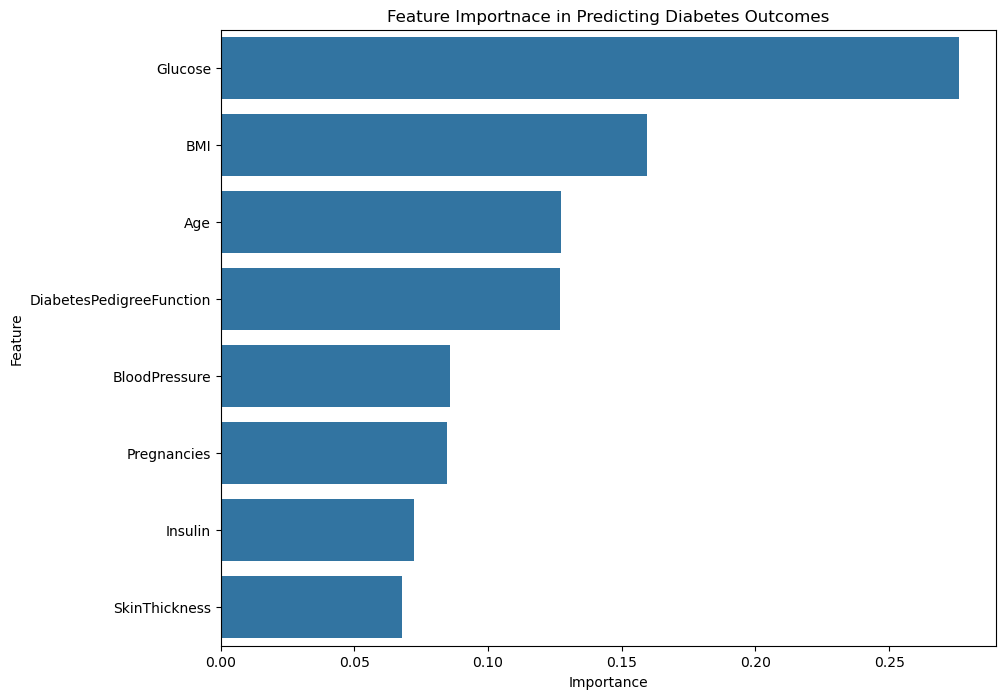

,Feature,Importance
1,Glucose,0.276009
5,BMI,0.159544
7,Age,0.127248
6,DiabetesPedigreeFunction,0.126731
2,BloodPressure,0.085606
0,Pregnancies,0.084456
4,Insulin,0.072409
3,SkinThickness,0.067997


In [70]:
#plotting the features 
plt.figure(figsize=([10,8]))
sns.barplot(data= importance_df, x='Importance', y='Feature')
plt.title('Feature Importnace in Predicting Diabetes Outcomes')
plt.show()
importance_df

The results highlight the most significant factors influencing diabetes outcomes.
Glucose is the most crucial factor with importance score of 0.276, 
followed by BMI with importance score of 0.16 and Age at 0.127.
these insights suggest that Glucose and BMI are key indicators in predicting diabetes.